In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset sobre revisões de alguns filmes

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/PNL/imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
df['sentiment'].value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

### Transformando positivo em 1 e negativo em 0

In [ ]:
classificacao = df['sentiment'].replace(['neg', 'pos'], [0, 1])
classificacao.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [ ]:
df['classificacao'] = classificacao
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
df.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


### Vetorizando as frases para análise

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(df.text_pt)
print(bag_of_words.shape)

(49459, 50)


### Treinando

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train, test, class_train, class_test = train_test_split(bag_of_words, classificacao, test_size = 0.2, random_state = 42)

regression = LogisticRegression()
regression.fit(train, class_train)

acc = regression.score(test, class_test)
print("A taxa de acurácia do modelo é: ", acc)

A taxa de acurácia do modelo é:  0.65760210270926


### Função para classificar sentimento

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    train, test, class_train, class_test = train_test_split(bag_of_words, texto[coluna_classificacao],
                                                           random_state = 42)


    regression = LogisticRegression()
    regression.fit(train, class_train)

    return regression.score(test, class_test)
print(classificar_texto(df, "text_pt", "classificacao"))

0.6583097452486858


### Nuvem de palvras negativas

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#lista com todas as frases
def palavras_neg(texto, coluna_texto):
  texto_neg = texto.query("sentiment == 'neg'")
  palavras = ''.join([texto for texto in texto_neg[coluna_texto]])

  cloud = WordCloud(background_color = 'white', width = 800,
                    height = 500, max_font_size = 110, collocations = False).generate(palavras)
  plt.figure(figsize = (10, 7))
  plt.imshow(cloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

### Nuvem de palavras positivas

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#lista com todas as frases
def palavras_pos(texto, coluna_texto):
  texto_pos = texto.query("sentiment == 'pos'")
  palavras = ''.join([texto for texto in texto_pos[coluna_texto]])

  cloud = WordCloud(background_color = 'white', width = 800,
                    height = 500, max_font_size = 110, collocations = False).generate(palavras)
  plt.figure(figsize = (10, 7))
  plt.imshow(cloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

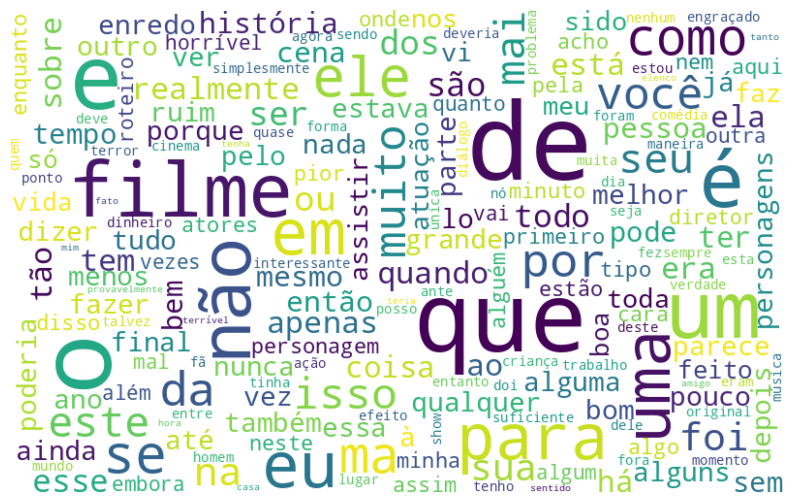

In [ ]:
palavras_neg(df, "text_pt")

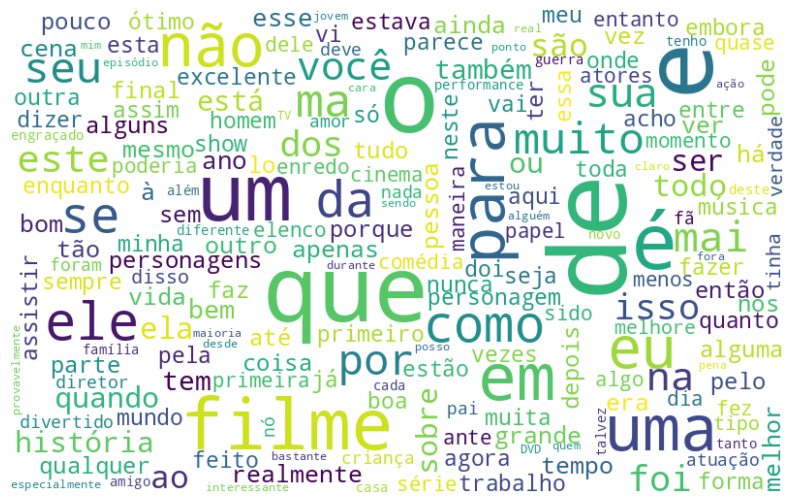

In [ ]:
palavras_pos(df, "text_pt")

### Tokenização

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from nltk import tokenize

palavras = ''.join([texto for texto in df.text_pt])

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(palavras)
frequencia = nltk.FreqDist(token_frase)

#Vizualisando em dataframe
df_freq = pd.DataFrame({"palavra": list(frequencia.keys()),
                        "Frequência": list(frequencia.values())})

In [ ]:
df_freq.nlargest(columns = "Frequência", n = 10)

,palavra,Frequência
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


### Gráfico para verificação da frequência de palavras

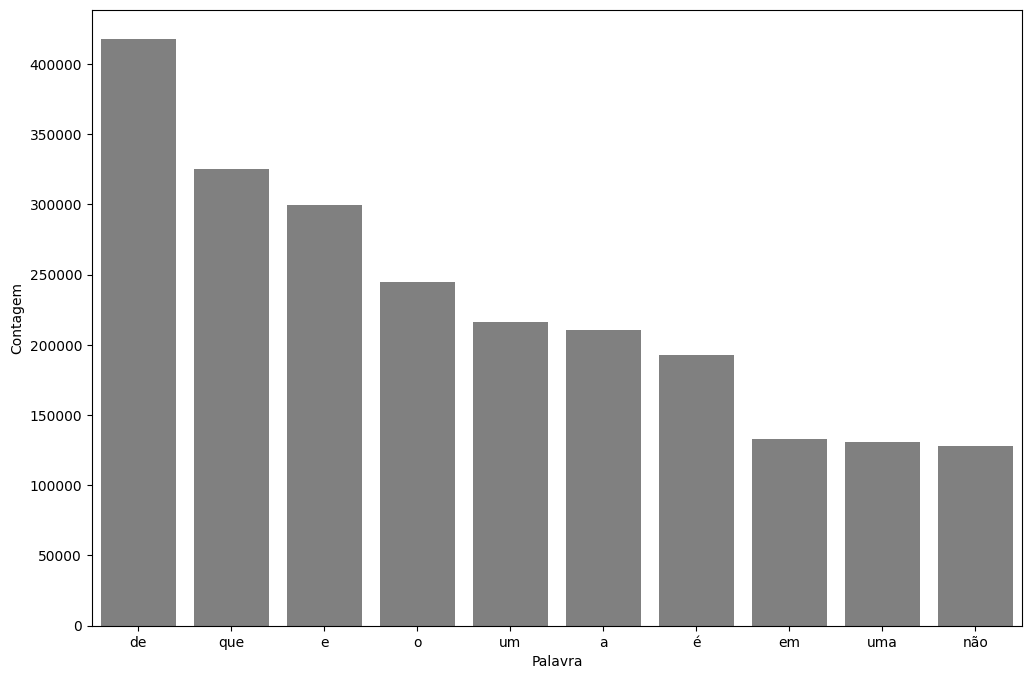

In [ ]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(df, "text_pt", 10)

### Removendo Stop Words

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

#acessando cada linha do dataframe na coluna de criticas para remoção das stopwords
frase_processada = list()
for opniao in df.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opniao)
  for palavra in palavras_texto:
    if palavra not in stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

df['sem_stop_words'] = frase_processada
df.head()

,id,text_en,text_pt,sentiment,classificacao,sem_stop_words
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
classificar_texto(df, "sem_stop_words", "classificacao")

0.6811160533764659

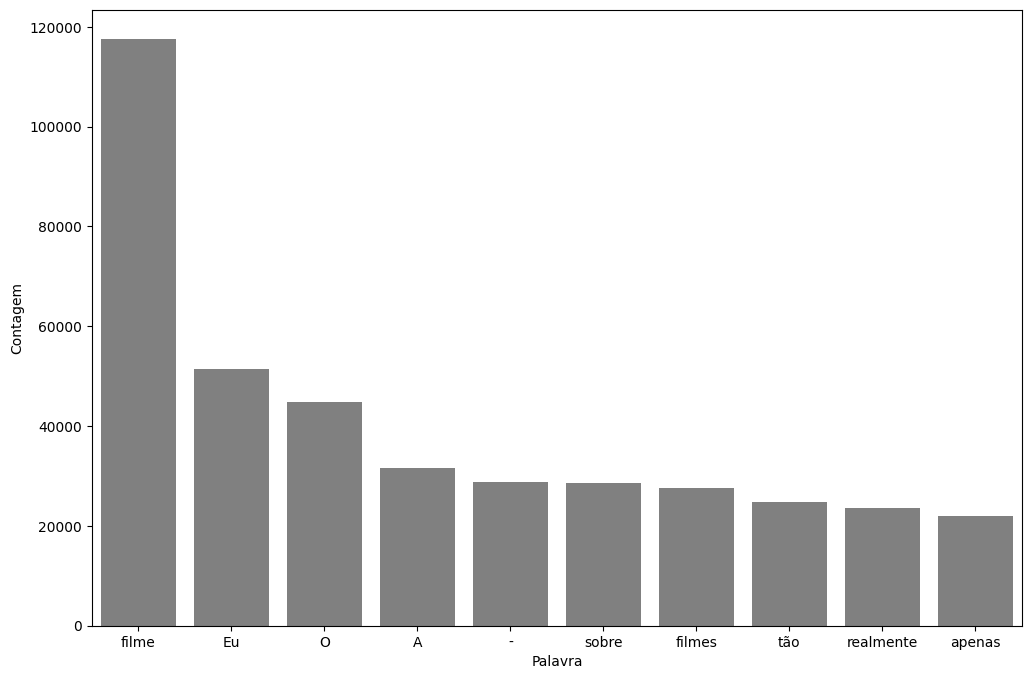

In [ ]:
pareto(df,"sem_stop_words", 10)

###Removendo pontuações do texto. A remoção de pontuação é essencial uma vez que o modelo considera tudo que está no corpus do texto como palavra.

In [ ]:
from nltk import tokenize
from string import punctuation

token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + stopwords

frase_processada = list()
for opiniao in df["sem_stop_words"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["sem_pontuacao"] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,sem_stop_words,sem_pontuacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [ ]:
df['sem_stop_words'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [ ]:
df["sem_pontuacao"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

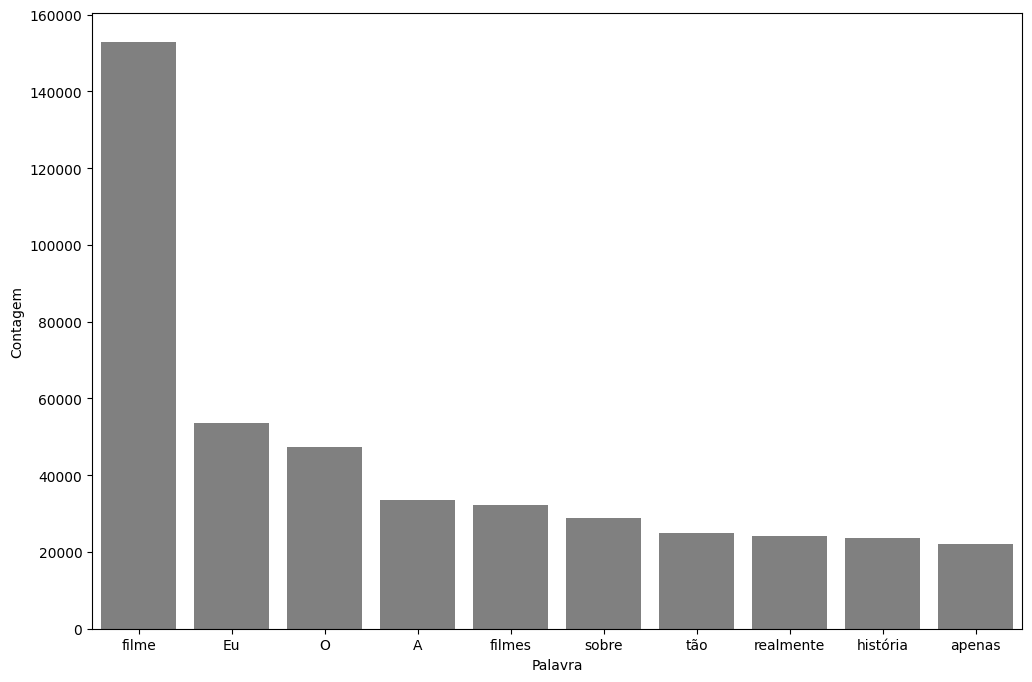

In [ ]:
pareto(df, "sem_pontuacao", 10)

###Removendo acentos  

In [ ]:
!pip install unidecode

In [ ]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in df['sem_pontuacao']]

In [ ]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

###Criando coluna sem acento

In [ ]:
df['sem_acento'] = sem_acentos

frase_processada = list()
for opiniao in df["sem_acento"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["sem_acento"] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,sem_stop_words,sem_pontuacao,sem_acento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [ ]:
acuracia_sem_acento = classificar_texto(df, "sem_acento", "classificacao")
print(acuracia_sem_acento)

0.6887990295188031


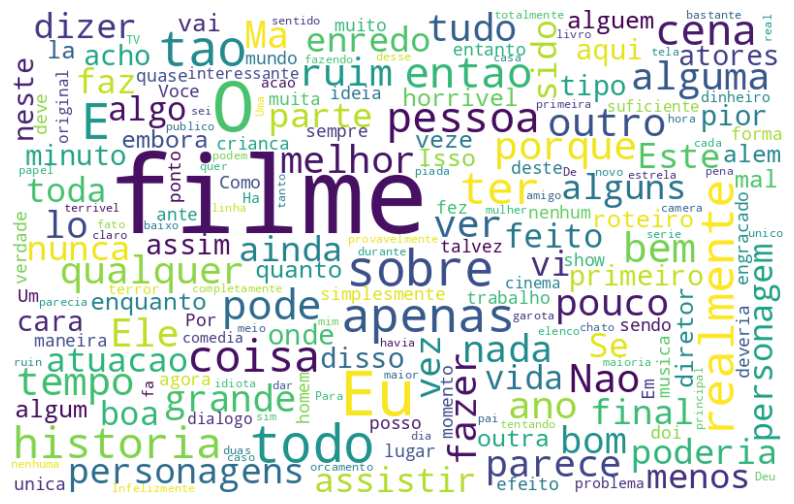

In [ ]:
palavras_neg(df, "sem_acento")

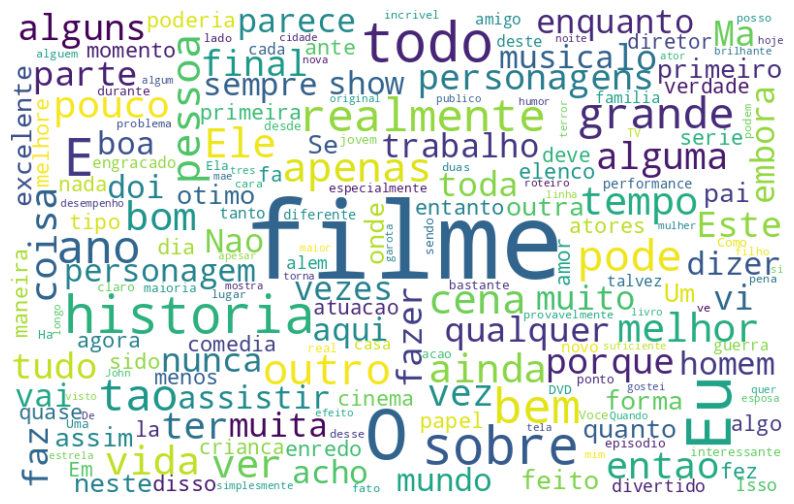

In [ ]:
palavras_pos(df, "sem_acento")

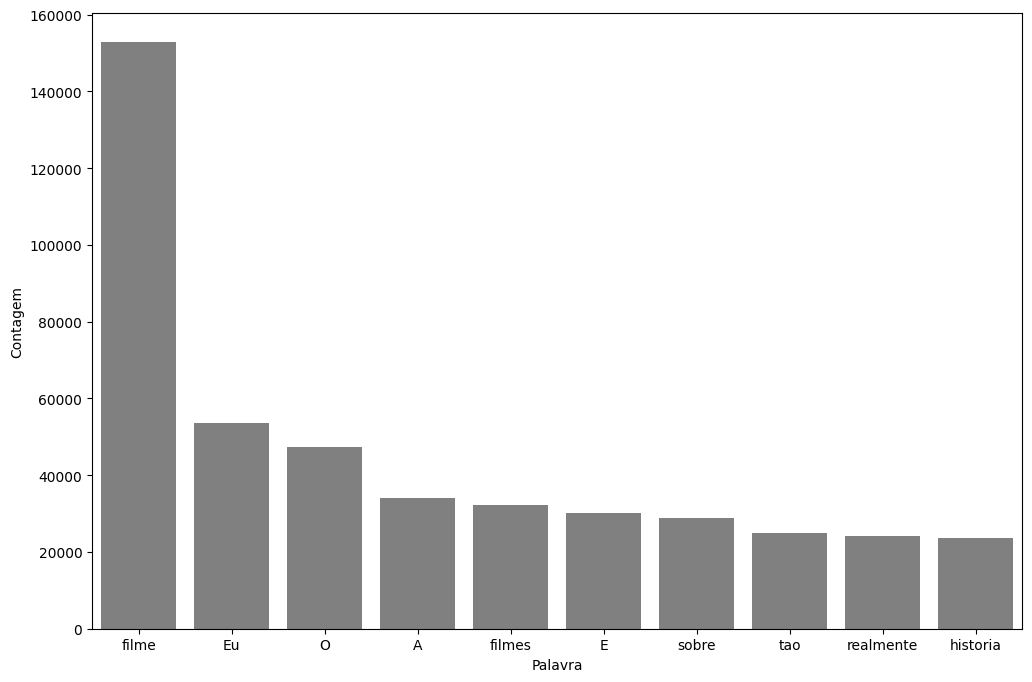

In [ ]:
pareto(df, "sem_acento", 10)

###Transformando em minúsculo para que capture mais stop words. Transformando em minúculo o algoritmo coonsegue detectar com mais facilidade as palavras

In [ ]:
frase_processada = list()
for opiniao in df["sem_acento"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["em_minusculo"] = frase_processada

###Comparando o texto original com os tratamentos

In [ ]:
df['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
df['em_minusculo'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
acuracia_minusculo = classificar_texto(df, "em_minusculo", "classificacao")
print(acuracia_minusculo)

0.6874241811564901


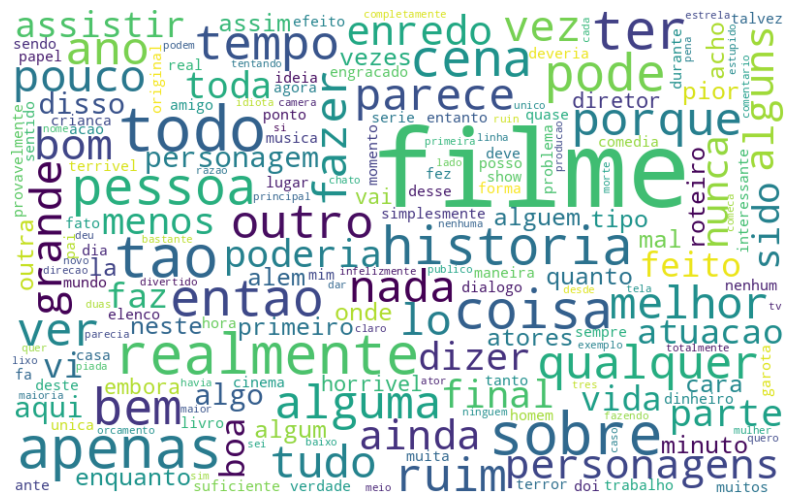

In [ ]:
palavras_neg(df, "em_minusculo")

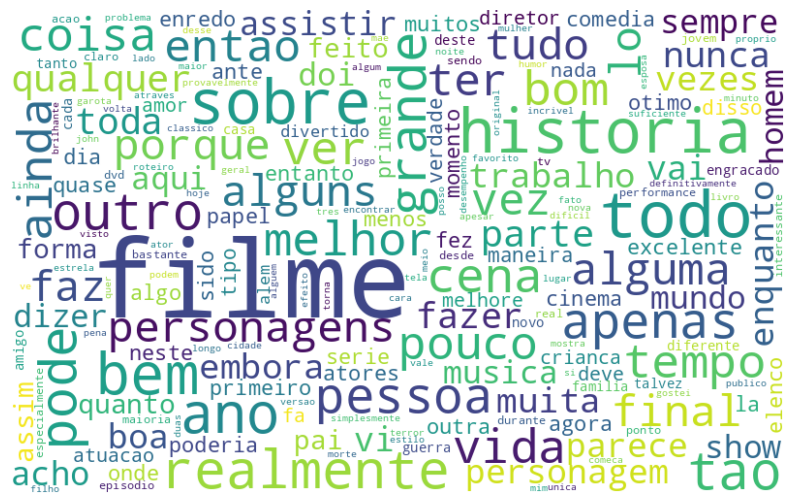

In [ ]:
palavras_pos(df, "em_minusculo")

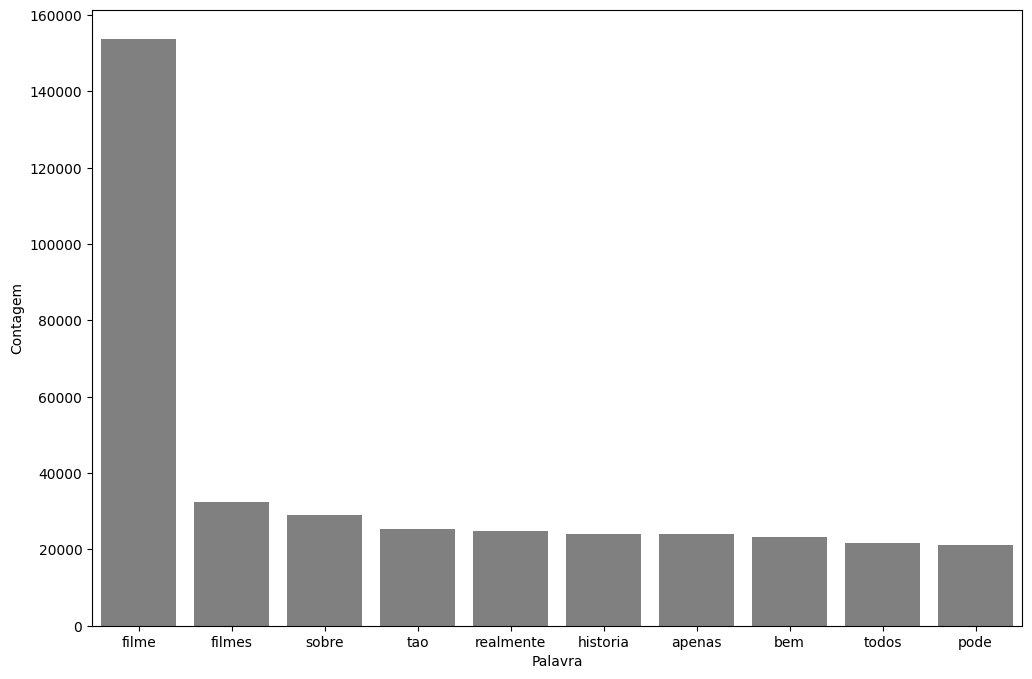

In [ ]:
pareto(df, "em_minusculo", 10)

### Stemitização:
- É um processo utilizado em processamento de linguagem natural que tem como objetivo reduzir palavras derivadas ou flexionadas ao seu radical ou raiz. Isso ajuda a tratar palavras com significados semelhantes como uma única entidade, facilitando a análise e a manipulação de texto.

In [ ]:
from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()

frase_processada = list()
for opiniao in df["em_minusculo"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

df["tratamento_5"] = frase_processada

In [ ]:
acuracia_tratamento_5 = classificar_texto(df, "tratamento_5", "classificacao")
print(acuracia_tratamento_5)

0.6954306510311363


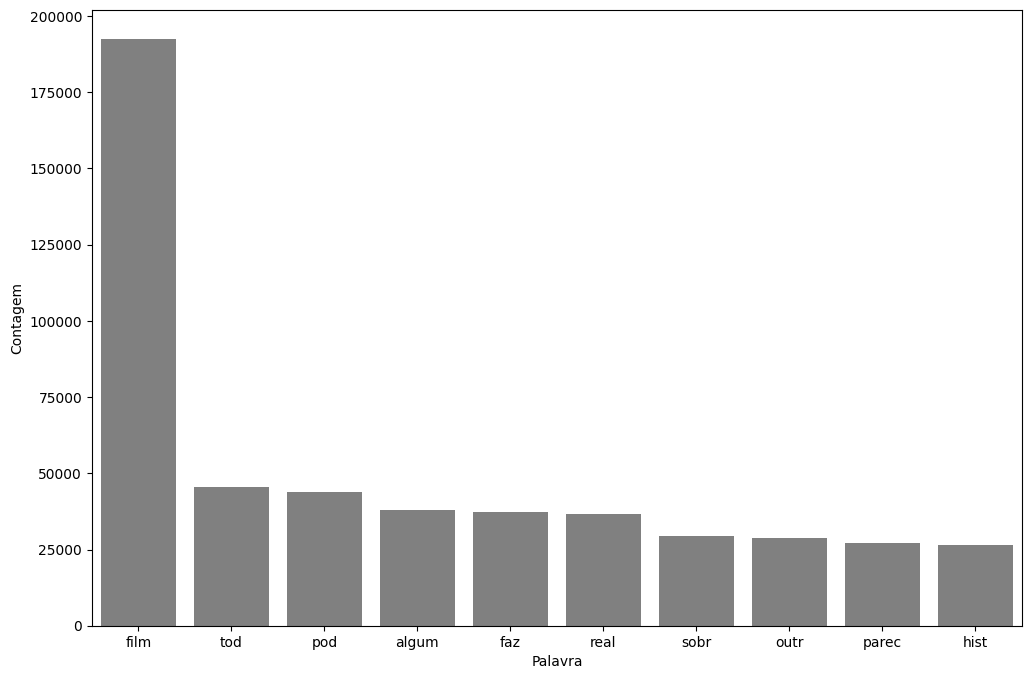

In [ ]:
pareto(df, "tratamento_5", 10)

###Vetorização - TF-IDF:

- É uma técnica amplamente utilizada em processamento de linguagem natural para avaliar a importância de uma palavra em um documento, levando em consideração um conjunto de documentos ou corpus.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase = False, max_features = 50)
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, df['classificacao'], test_size = 0.2, random_state = 42)

regression = LogisticRegression()
regression.fit(treino, classe_treino)

acc_tratamento_5 = regression.score(teste, classe_teste)
print("A taxa de acurácia do modelo é: ", acc_tratamento_5)

A taxa de acurácia do modelo é:  0.6974322684997978


###Aplicando o Ngrams

- NGrams são sequências de $n$ itens (ou unidades) extraídas de um texto, onde os itens podem ser palavras, caracteres, sílabas, ou outras unidades linguísticas. Eles são utilizados em várias aplicações de processamento de linguagem natural (PLN) e aprendizado de máquina para capturar padrões de co-ocorrência de palavras ou caracteres.

In [ ]:
from nltk import ngrams

tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, df['classificacao'], random_state = 42)

regression.fit(treino, classe_treino)

acc_ngrams = regression.score(teste, classe_teste)
print("A taxa de acurácia do modelo é: ", acc_ngrams)

A taxa de acurácia do modelo é:  0.8856449656287909


### A taxa de acurácia do modelo está muito boa considerando todo o tratamento realizado anteriormente, isso significa que de 10 palavras o modelo vai conseguir procesar e entender o sentimento de pelo menos 8 delas.